In [1]:
import torch
import random
import torch.nn as nn
from model import LinearRNN
from data import load_data, name_to_tensor
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

category_lines, all_categories = load_data()
n_categories = len(all_categories)

model = LinearRNN(input_size=57, hidden_size=256, output_size=n_categories).to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [3]:
def random_training_example():
    category = random.choice(all_categories)
    name = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long).to(device)
    name_tensor = name_to_tensor(name)
    name_tensor = [t.to(device) for t in name_tensor]
    return category_tensor, name_tensor

def train(n_iters=100000):
    model.train()
    training_losses = []
    current_loss = 0
    for iter in range(1, n_iters + 1):
        category_tensor, name_tensor = random_training_example()
        optimizer.zero_grad()
        output = model(name_tensor)
        loss = criterion(output, category_tensor)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()

        if iter % 500 == 0:
            print(f"Epoch: {iter} | Loss: {(current_loss / 500)}")
            training_losses.append(current_loss / 500)
            current_loss = 0
    
    plt.plot(range(len(training_losses)),training_losses)
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()
    
    torch.save(model.state_dict(), "model.pth")

Epoch: 500 | Loss: 2.8849255266189577
Epoch: 1000 | Loss: 2.868924464702606
Epoch: 1500 | Loss: 2.8510517959594726
Epoch: 2000 | Loss: 2.836797191143036
Epoch: 2500 | Loss: 2.813446451663971
Epoch: 3000 | Loss: 2.794259753704071
Epoch: 3500 | Loss: 2.753039328098297
Epoch: 4000 | Loss: 2.7068774421215056
Epoch: 4500 | Loss: 2.6675739986896514
Epoch: 5000 | Loss: 2.590616691827774
Epoch: 5500 | Loss: 2.564521444559097
Epoch: 6000 | Loss: 2.4169837692976
Epoch: 6500 | Loss: 2.4182103891968727
Epoch: 7000 | Loss: 2.381887324869633
Epoch: 7500 | Loss: 2.3251137315630914
Epoch: 8000 | Loss: 2.1808459275364878
Epoch: 8500 | Loss: 2.198197093307972
Epoch: 9000 | Loss: 2.0654723363518714
Epoch: 9500 | Loss: 2.0671289176940917
Epoch: 10000 | Loss: 2.0146923809051516
Epoch: 10500 | Loss: 2.0169594192802904
Epoch: 11000 | Loss: 1.9214398582577705
Epoch: 11500 | Loss: 1.8908350987434388
Epoch: 12000 | Loss: 1.9251240957081317
Epoch: 12500 | Loss: 1.8160595717579127
Epoch: 13000 | Loss: 1.873611832

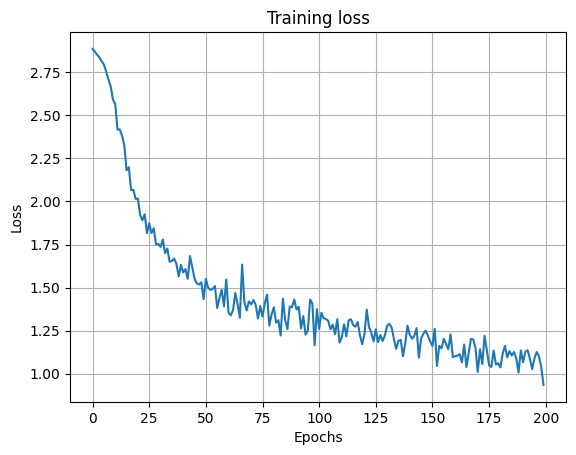

In [4]:
if __name__ == "__main__":
    train()